In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUM_OF_FOLDS = 5
df = pd.read_csv('./data/Grid_HOKEY_OPT_LR_kfolds_5_batch_64_epochs_20.csv', index_col=[0])

In [3]:
optimizer = "param_model__optimizer"
learning_rate = "param_optimizer__learning_rate"
grid_iterations = []
for opt in df.param_model__optimizer.unique():
    for lr in df.param_optimizer__learning_rate.unique():
        grid_iterations.append(df[(df[optimizer]==opt) & (df[learning_rate]==lr)])

In [4]:
df_data = []
for itr in grid_iterations:
    opt = itr.param_model__optimizer.iloc[0]
    lr = itr.param_optimizer__learning_rate.iloc[0]
    mean_accuracy = round(itr.mean_test_accuracy.iloc[0]* 100, 1) 
    std_accuracy = itr.std_test_accuracy.iloc[0]
    mean_f1 = round(itr.mean_test_f1_micro.iloc[0]* 100,1)
    std_f1 = itr.std_test_f1_micro.iloc[0]
    mean_roc_auc = round(itr.mean_test_roc_auc.iloc[0]* 100,1)
    std_roc_auc = itr.std_test_roc_auc.iloc[0]
    rank_acc = itr.rank_test_accuracy.iloc[0]
    rank_f1 = itr.rank_test_f1_micro.iloc[0]
    rank_roc = itr.rank_test_roc_auc.iloc[0]
    total_rank = round((rank_acc+rank_f1+rank_roc)/3, 2)
    result = f"Mean scores for {opt} with learning rate of {lr}: ACC: {mean_accuracy}%, F1: {mean_f1}%, ROC: {mean_roc_auc}%. RANK: {total_rank}"
    print(result)
    df_data.append({"Optimaizer": opt, "Learning Rate": lr, "ACC": mean_accuracy, "F1": mean_f1, "ROC": mean_roc_auc, "Score": int(total_rank)})

Mean scores for Adam with learning rate of 0.01: ACC: 89.2%, F1: 89.2%, ROC: 95.6%. RANK: 2.33
Mean scores for Adam with learning rate of 0.001: ACC: 88.1%, F1: 88.1%, ROC: 95.9%. RANK: 3.67
Mean scores for Adam with learning rate of 0.0005: ACC: 89.7%, F1: 89.7%, ROC: 95.8%. RANK: 1.33
Mean scores for Adam with learning rate of 0.0001: ACC: 88.3%, F1: 88.3%, ROC: 95.4%. RANK: 3.33
Mean scores for SGD with learning rate of 0.01: ACC: 71.6%, F1: 71.6%, ROC: 85.6%. RANK: 11.0
Mean scores for SGD with learning rate of 0.001: ACC: 79.1%, F1: 79.1%, ROC: 88.0%. RANK: 9.0
Mean scores for SGD with learning rate of 0.0005: ACC: 70.0%, F1: 70.0%, ROC: 85.8%. RANK: 11.33
Mean scores for SGD with learning rate of 0.0001: ACC: 74.2%, F1: 74.2%, ROC: 85.2%. RANK: 10.67
Mean scores for RMSprop with learning rate of 0.01: ACC: 88.3%, F1: 88.3%, ROC: 94.4%. RANK: 4.33
Mean scores for RMSprop with learning rate of 0.001: ACC: 82.8%, F1: 82.8%, ROC: 94.2%. RANK: 6.67
Mean scores for RMSprop with learnin

In [5]:
scores = pd.DataFrame(df_data).sort_values(['Score'])
scores

,Optimaizer,Learning Rate,ACC,F1,ROC,Score
2,Adam,0.0005,89.7,89.7,95.8,1
0,Adam,0.0100,89.2,89.2,95.6,2
1,Adam,0.0010,88.1,88.1,95.9,3
3,Adam,0.0001,88.3,88.3,95.4,3
8,RMSprop,0.0100,88.3,88.3,94.4,4
9,RMSprop,0.0010,82.8,82.8,94.2,6
10,RMSprop,0.0005,86.3,86.3,94.2,6
11,RMSprop,0.0001,80.1,80.1,93.7,8
5,SGD,0.0010,79.1,79.1,88.0,9
7,SGD,0.0001,74.2,74.2,85.2,10


In [6]:
scores.to_csv('./OPT_LR_GRID.csv')

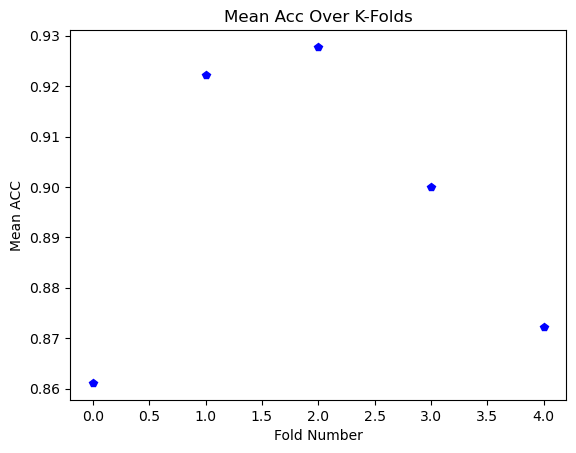

In [7]:
top = grid_iterations[scores.index[0]]
y = []
x = range(NUM_OF_FOLDS)
for i in x:
    col = f"split{i}_test_accuracy"
    y.append(top[col].values[0])
plt.plot(x,y, 'bp')
plt.xlabel('Fold Number')
plt.ylabel('Mean ACC')
plt.title('Mean Acc Over K-Folds')
plt.show()